In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!unrar x  '/content/gdrive/My Drive/BelgiumTSC.rar'

In [0]:
import glob
from skimage.transform import resize
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import skimage.transform
import tensorflow as tf
import os
import cv2

In [0]:
def read_dataset(Directory):
  labels = []
  images = []
 
  directories = [direc for direc in os.listdir(Directory) 
                   if os.path.isdir(os.path.join(Directory, direc))]

  for direc in directories:
        label = os.path.join(Directory, direc)
        img_names = [os.path.join(label, img) 
                      for img in os.listdir(label) if img.endswith(".ppm")]
       
        for img in img_names:
          imag = cv2.imread(img)
          imag = skimage.transform.resize(imag, (32,32), mode='constant')
          images.append(imag)
          labels.append(int(direc))

  return images, labels


In [0]:
images, labels = read_dataset('/content/BelgiumTSC/Training/')
images_test, labels_test = read_dataset('/content/BelgiumTSC/Testing/')

In [0]:
labelsn= np.array(labels)
z=[]
for i in range(62):
  z.append(np.count_nonzero(labelsn == i))

In [0]:
def display_images(images, label):
    fig= plt.figure(figsize=(8,10))
    fig.patch.set_facecolor('grey')
    fig.patch.set_alpha(.3)
    img = labels.index(label)
    plt.title(label)
    plt.subplot(5, 4, 1)
    plt.axis('off')
    plt.imshow(images[img+1])
    color='yellow'
    plt.text(-1, 50, "Sign From Class: {0} \nContains: {1} Image".format(label,z[label]),fontsize=16, color=color)
    plt.show()

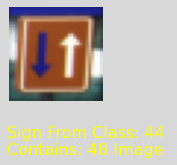

In [0]:
#choose a label from 0 to 61 to plot photos
display_images(images, 44)

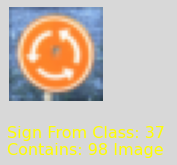

In [0]:
display_images(images, 37)

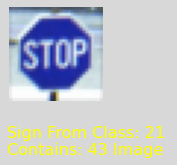

In [0]:
display_images(images, 21)

In [0]:
np_labels = np.array(labels)
np_images = np.array(images)
print("labels: ", np_labels.shape, "\nimages: ", np_images.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [0]:
np_test_images = np.array(images_test)
np_test_labels = np.array(labels_test)
print("labels: ", np_test_labels.shape, "\nimages: ", np_test_images.shape)

labels:  (2520,) 
images:  (2520, 32, 32, 3)


In [0]:
from tensorflow.keras import datasets, layers, models

In [0]:
model = models.Sequential()
#layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=( 32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

#layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

#flatten
model.add(layers.Flatten())

#output layer
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(62))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [0]:
#from keras.optimizers import SGD
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(np_images, np_labels, validation_split = 0.05,epochs=10)

Epoch 1/10
136/136 [==============================] - 1s 10ms/step - loss: 2.2800 - accuracy: 0.4696 - val_loss: 4.4380 - val_accuracy: 0.0000e+00
Epoch 2/10
136/136 [==============================] - 1s 7ms/step - loss: 0.8916 - accuracy: 0.7612 - val_loss: 1.9277 - val_accuracy: 0.1004
Epoch 3/10
136/136 [==============================] - 1s 7ms/step - loss: 0.4901 - accuracy: 0.8670 - val_loss: 1.3134 - val_accuracy: 0.5502
Epoch 4/10
136/136 [==============================] - 1s 7ms/step - loss: 0.3304 - accuracy: 0.9017 - val_loss: 0.9561 - val_accuracy: 0.6987
Epoch 5/10
136/136 [==============================] - 1s 7ms/step - loss: 0.2206 - accuracy: 0.9333 - val_loss: 1.2389 - val_accuracy: 0.6419
Epoch 6/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1577 - accuracy: 0.9533 - val_loss: 1.3654 - val_accuracy: 0.6288
Epoch 7/10
136/136 [==============================] - 1s 7ms/step - loss: 0.1291 - accuracy: 0.9618 - val_loss: 1.5043 - val_accuracy: 0.5677
E

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

In [0]:
test_loss, test_acc = model.evaluate(np_test_images,  np_test_labels, verbose=2)

79/79 - 0s - loss: 0.2091 - accuracy: 0.9516


In [0]:
predict = np.argmax(model.predict(np_test_images), axis = 1)

In [0]:
#len(np.unique(np_test_labels))
sawsaw=[]
for i in range(62):
  sawsaw.append(np.count_nonzero(np_test_labels == i))

np_predict= []
for z in range(2520):
  np_predict.append(predict[z])  

In [0]:
def plot_image(images_num):
  fig = plt.figure(figsize=(11, 10))
  real_label = np_test_labels[images_num]
  prediction = np_predict[images_num]
  predictedClassImgLabel = np.where(np_test_labels == prediction)
  ImgFromPredictedClass=predictedClassImgLabel[0][0]
  i=1

  for x in range(2):
    plt.subplot(5,2,i)
    plt.axis('off')
    plt.imshow(np_test_images[images_num])
    images_num = ImgFromPredictedClass
    i+=1
  color='purple' if real_label == prediction else 'yellow'
  plt.text(-75, 22, "True Label: {0} (Left Image)\nPredicted: {1} (Right Image)\nContains: {2} Image".format(real_label, prediction,sawsaw[real_label]), 
             fontsize=14, color=color,bbox=dict(facecolor='black', alpha=0.4))
  plt.show()
    

In [0]:
x=[]
for d in range(2520):
  if(np_test_labels[d] != np_predict[d]):
    x.append(d)
z=np.array(x)
z

array([   0,    6,   13,   45,   54,  116,  119,  144,  158,  173,  177,
        184,  192,  259,  381,  384,  385,  387,  392,  419,  433,  443,
        465,  469,  472,  477,  559,  569,  570,  575,  580,  589,  591,
        598,  611,  625,  665,  686,  690,  699,  705,  826,  901, 1033,
       1034, 1036, 1038, 1039, 1046, 1106, 1108, 1127, 1131, 1159, 1175,
       1179, 1191, 1215, 1216, 1228, 1247, 1258, 1263, 1306, 1315, 1319,
       1325, 1390, 1395, 1421, 1434, 1449, 1457, 1472, 1473, 1474, 1495,
       1508, 1520, 1524, 1525, 1532, 1551, 1555, 1589, 1630, 1631, 1632,
       1706, 1753, 1866, 1868, 1869, 1871, 1878, 1882, 1883, 1891, 1893,
       1896, 2011, 2039, 2172, 2292, 2346, 2462, 2464, 2465, 2468, 2470,
       2471, 2473, 2476, 2481, 2483, 2486, 2490, 2491, 2505, 2509, 2516,
       2518])

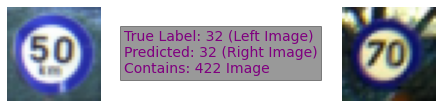

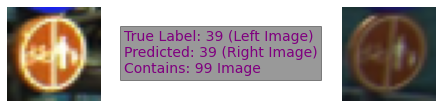

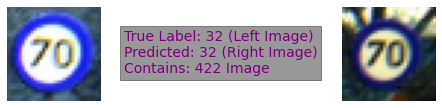

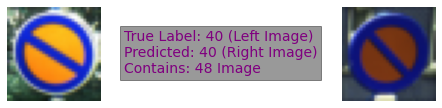

In [0]:
plot_image(2199)
plot_image(323)
plot_image(2000)
plot_image(2513)

In [0]:
classes =[]
for i in range(62):
  classes.append(i)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(np_test_labels, predict , classes))
print('Classification Report')
print(classification_report(np_test_labels, predict , classes))


Confusion Matrix
[[  6   0   0 ...   0   0   0]
 [  0  27   0 ...   0   0   0]
 [  0   0   6 ...   0   0   0]
 ...
 [  0   0   0 ...  17   0   0]
 [  0   0   0 ...   0   9   2]
 [  0   0   0 ...   0   0 105]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        27
           2       1.00      0.86      0.92         7
           3       0.29      0.83      0.43         6
           4       0.86      0.50      0.63        12
           5       0.00      0.00      0.00         3
           6       0.71      0.83      0.77         6
           7       1.00      0.96      0.98        90
           8       0.64      0.75      0.69        12
           9       0.00      0.00      0.00         0
          10       1.00      0.75      0.86        28
          11       0.00      0.00      0.00         0
          12       1.00      0.67      0.80         3
          13

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
import pandas as pd
con_mat = tf.math.confusion_matrix(labels=np_test_labels, predictions=predict).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
con_mat_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,1.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
1,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2,0.0,0.0,0.86,0.00,0.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
3,0.0,0.0,0.00,0.83,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.17,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
4,0.0,0.0,0.00,0.00,0.50,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.00,0.17,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.93,0.0,0.0,0.00,0.00
58,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0,0.00,0.00
59,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.0,0.00,0.00
60,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.82,0.18


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


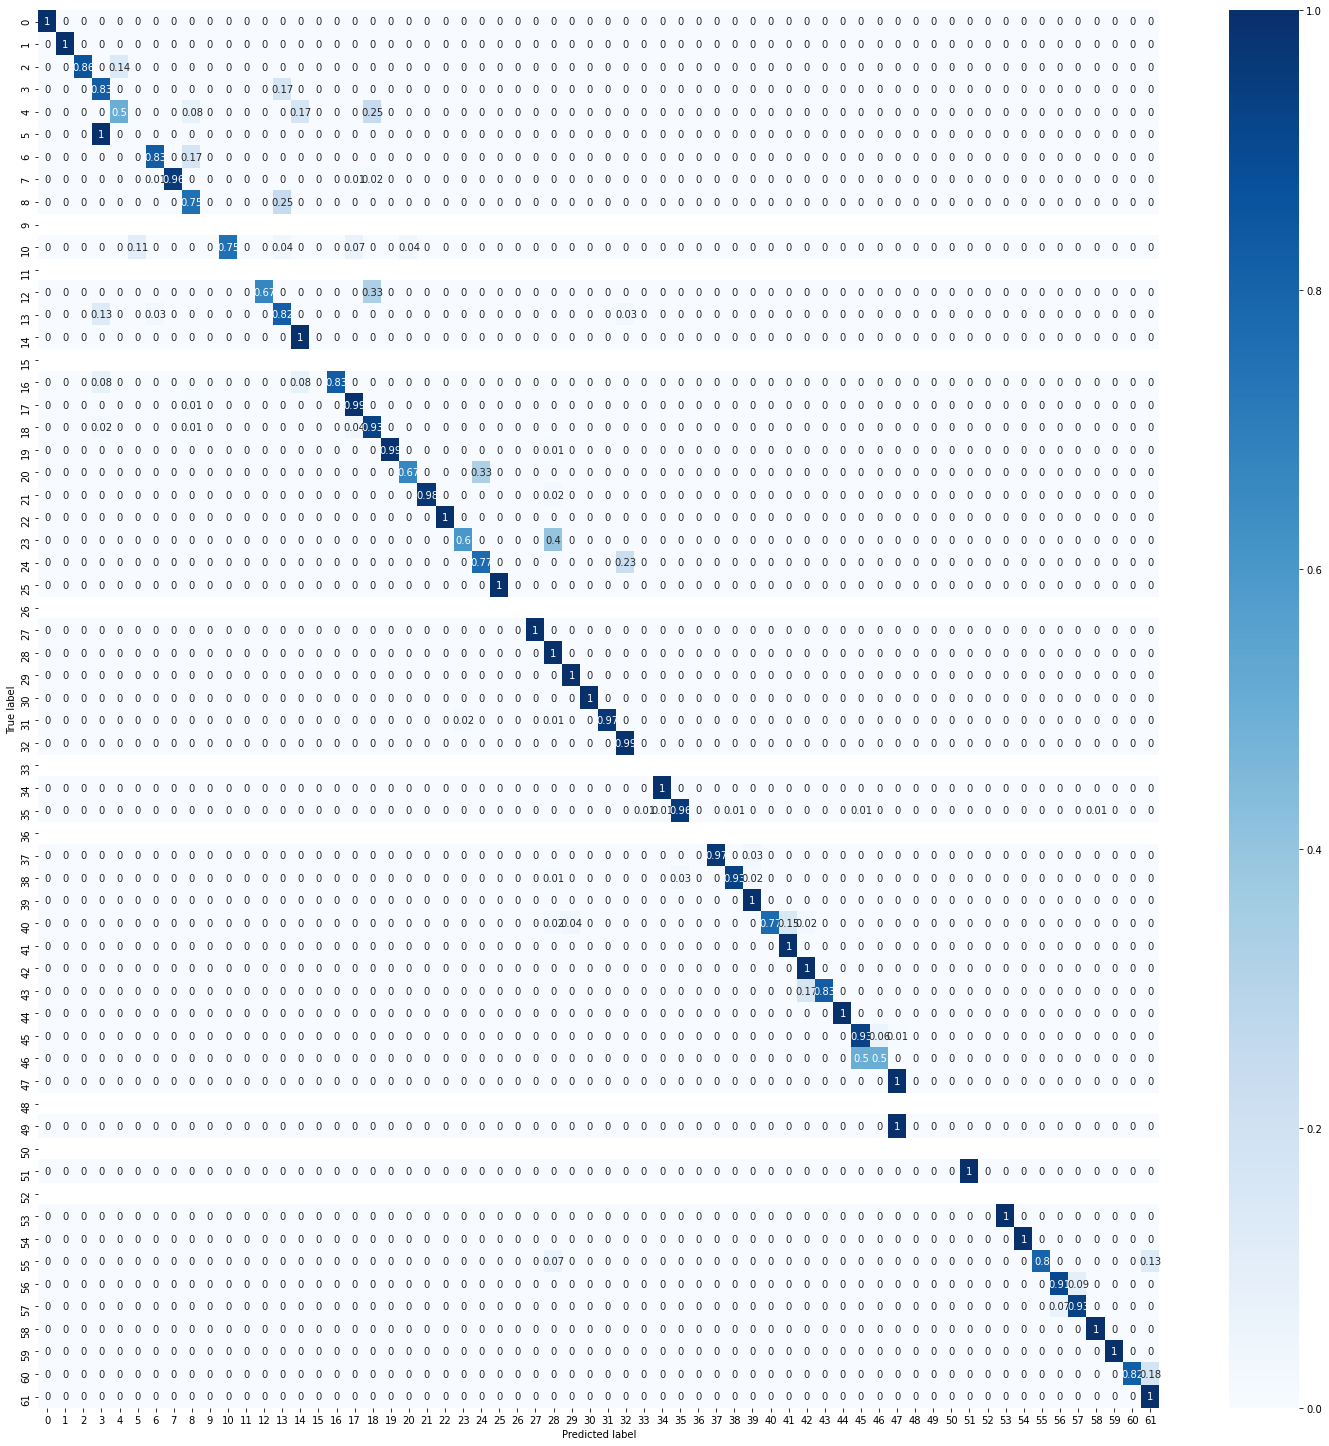

In [0]:
import seaborn as sns
figure = plt.figure(figsize=(20, 20))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()